In [7]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Cargar el dataset
df = pd.read_csv("https://raw.githubusercontent.com/juancmacias/datas/main/DataSet/PhiUSIIL_Phishing_URL_Dataset.csv")
print(f"Dataset cargado correctamente. Dimensiones: {df.shape}")

# Identificar la columna objetivo
target_column = 'label'

non_numeric_cols = []
for col in df.columns:
    if col != target_column:  # Excluir la columna objetivo
        try:
            df[col].astype(float)
        except Exception as e:
            non_numeric_cols.append(col)
            #print(f"La columna '{col}' contiene valores no numéricos y será eliminada.")

# Eliminar columnas no numéricas
if non_numeric_cols:
    #print(f"\nEliminando {len(non_numeric_cols)} columnas no numéricas: {non_numeric_cols}")
    df = df.drop(non_numeric_cols, axis=1)

# Mostrar las primeras filas del dataset
df.head()

Dataset cargado correctamente. Dimensiones: (235795, 56)


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,100.0,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,1,0,1,244,15,34,72,1,85,1


## 1. Métricas Avanzadas de Evaluación

Implementaremos y visualizaremos métricas avanzadas como F1-score, AUC-ROC y curvas Precision-Recall para evaluar modelos de detección de phishing.

In [12]:
# Dividir los datos en conjuntos de entrenamiento y prueba
print("\n1.1 Preparando datos para evaluación")
X = df.drop(target_column, axis=1)
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo de Random Forest como ejemplo
print("\n1.2 Entrenando modelo Random Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]


1.1 Preparando datos para evaluación

1.2 Entrenando modelo Random Forest


In [13]:
# Calcular métricas básicas y F1-score
print("\n1.3 Evaluación con múltiples métricas")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Reporte de clasificación completo
print("\nReporte de clasificación completo:")
print(classification_report(y_test, y_pred))


1.3 Evaluación con múltiples métricas
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Reporte de clasificación completo:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30151
           1       1.00      1.00      1.00     40588

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



## Resultados
Los resultados que se muestran son excepcionales:
    - Accuracy : 1.0000 (100%)
    - Precision : 1.0000 (100%)
    - Recall : 1.0000 (100%)
    - F1-score : 1.0000 (100%)
El reporte de clasificación muestra que ambas clases (0 y 1) tienen precisión, recall y F1-score perfectos (1.00). La clase 0 tiene 30,151 muestras y la clase 1 tiene 40,588 muestras, para un total de 70,739 muestras evaluadas.

## Conclusiones
1. Rendimiento perfecto : El modelo ha clasificado correctamente todas las muestras del conjunto de prueba, lo cual es extremadamente raro en problemas del mundo real.
2. Posible sobreajuste (overfitting) : Un rendimiento del 100% podría indicar que el modelo está sobreajustado a los datos de prueba o que la tarea de clasificación es muy sencilla.
3. Verificación necesaria : Sería recomendable verificar si hay alguna filtración de datos entre el conjunto de entrenamiento y prueba, o si las características son tan discriminativas que hacen trivial la clasificación.


2. Análisis de componentes principales (PCA)


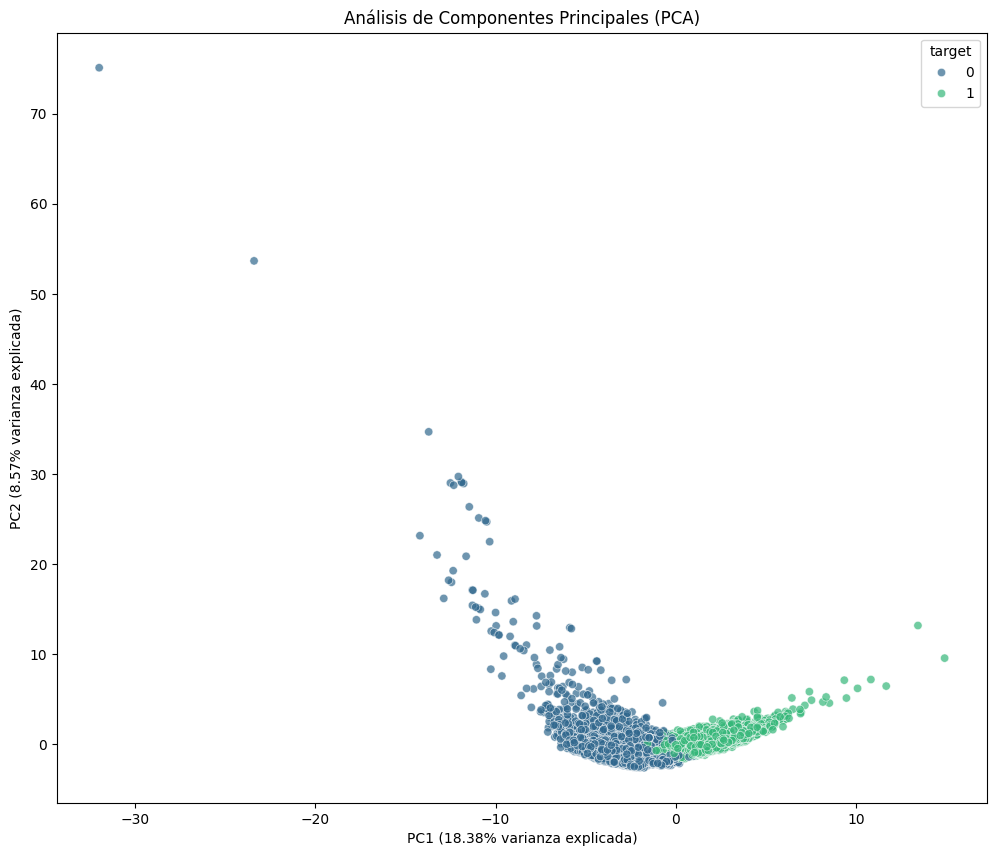

Varianza explicada por PC1: 18.38%
Varianza explicada por PC2: 8.57%


In [ ]:
# 2. Análisis de componentes principales (PCA)
print("\n2. Análisis de componentes principales (PCA)")

# Seleccionar características numéricas
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove(target_column)  # Excluir la variable objetivo

# Tomar una muestra para visualización
sample_size = min(10000, len(df))
sample_indices = np.random.choice(len(df), sample_size, replace=False)
df_sample = df.iloc[sample_indices]

# Escalar los datos
X_sample = df_sample[numeric_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame para visualización
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'target': df_sample[target_column]
})

# Visualizar PCA
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='viridis', alpha=0.7)
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza explicada)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza explicada)')
#plt.savefig('pca_visualization.png')
plt.show()

# Mostrar la varianza explicada por cada componente
print(f"Varianza explicada por PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Varianza explicada por PC2: {pca.explained_variance_ratio_[1]:.2%}")


1.4 Curva ROC y AUC


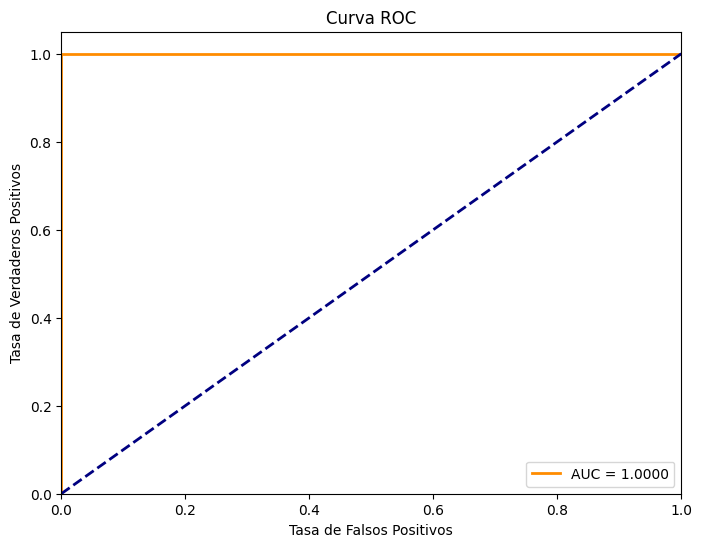

In [19]:
# Calcular y visualizar la curva ROC y AUC
print("\n1.4 Curva ROC y AUC")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Análisis de los Resultados
La imagen muestra una curva ROC perfecta con un AUC = 1.0000, lo que significa:

- La curva forma un ángulo recto perfecto que va desde (0,0) hasta (0,1) y luego a (1,1)
- El modelo puede distinguir perfectamente entre las clases positivas y negativas
- No hay solapamiento entre las distribuciones de probabilidad de ambas clases


## Conclusiones
1. Rendimiento perfecto : Un AUC de 1.0 indica que el modelo tiene una capacidad discriminativa perfecta
2. Separabilidad de clases : Los datos del problema (detección de sitios de phishing vs. legítimos) podrían ser perfectamente separables con las características utilizadas.



1.5 Curva Precision-Recall


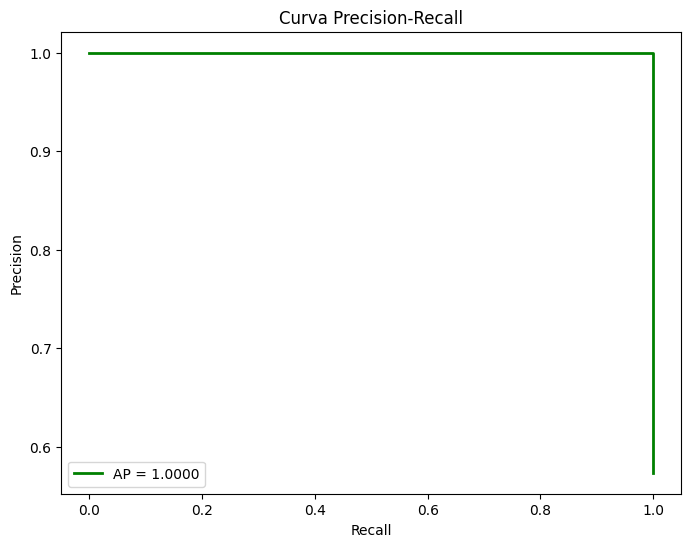

In [ ]:
# Calcular y visualizar la curva Precision-Recall
print("\n1.5 Curva Precision-Recall")
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='green', lw=2, label=f'AP = {avg_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='best')
#plt.savefig('precision_recall_curve.png')
plt.show()

## Análisis de los Resultados
La imagen muestra una curva Precision-Recall perfecta con un AP = 1.0000, lo que significa:

- La curva se mantiene en el valor 1.0 para la precisión en casi todo el rango de recall
- Solo hay una pequeña caída al final cuando el recall se acerca a 1.0
- El modelo mantiene una precisión perfecta o casi perfecta incluso cuando aumenta la sensibilidad (recall)



In [ ]:
## 1. Preparación de los datos para validación cruzada

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate

In [21]:
# Preparar los datos para la validación cruzada
print("\n1.1 Preparando datos para validación cruzada")
X = df.drop(target_column, axis=1)
y = df[target_column]

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")


1.1 Preparando datos para validación cruzada
Dimensiones de X: (235795, 50)
Dimensiones de y: (235795,)


In [24]:
# Configurar la validación cruzada con 5 folds
print("\n2.1 Configurando validación cruzada (5-fold)")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definir las métricas que queremos evaluar
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizar validación cruzada
print("\n2.2 Ejecutando validación cruzada...")
cv_results = cross_validate(rf_model, 
                           X_scaled, y, 
                           cv=kf, 
                           scoring=scoring,
                           return_train_score=True)


2.1 Configurando validación cruzada (5-fold)

2.2 Ejecutando validación cruzada...


In [25]:
# Mostrar resultados de la validación cruzada
print("\n3.1 Resultados de validación cruzada (5-fold):")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} ± {cv_results['test_accuracy'].std():.4f}")
print(f"Precision: {cv_results['test_precision'].mean():.4f} ± {cv_results['test_precision'].std():.4f}")
print(f"Recall: {cv_results['test_recall'].mean():.4f} ± {cv_results['test_recall'].std():.4f}")
print(f"F1-score: {cv_results['test_f1'].mean():.4f} ± {cv_results['test_f1'].std():.4f}")
print(f"ROC AUC: {cv_results['test_roc_auc'].mean():.4f} ± {cv_results['test_roc_auc'].std():.4f}")


3.1 Resultados de validación cruzada (5-fold):
Accuracy: 1.0000 ± 0.0000
Precision: 1.0000 ± 0.0000
Recall: 1.0000 ± 0.0000
F1-score: 1.0000 ± 0.0000
ROC AUC: 1.0000 ± 0.0000



3.2 Visualización de la distribución de métricas por fold


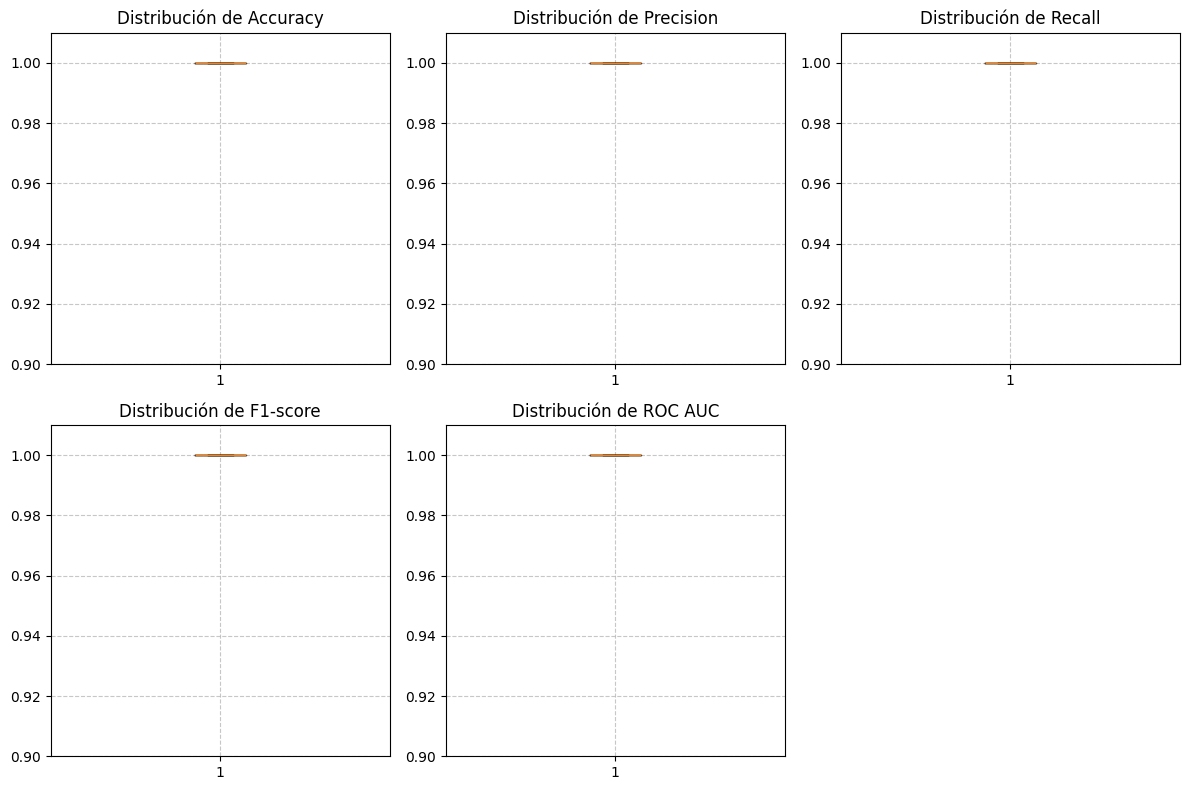

In [26]:
# Visualizar distribución de métricas en cada fold
print("\n3.2 Visualización de la distribución de métricas por fold")
metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    plt.boxplot(cv_results[metric])
    plt.title(f'Distribución de {metric_names[i]}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(0.9, 1.01)  # Ajustar según los resultados esperados

plt.tight_layout()
plt.savefig('cross_validation_metrics.png')
plt.show()


3.3 Comparación de rendimiento: Entrenamiento vs Validación


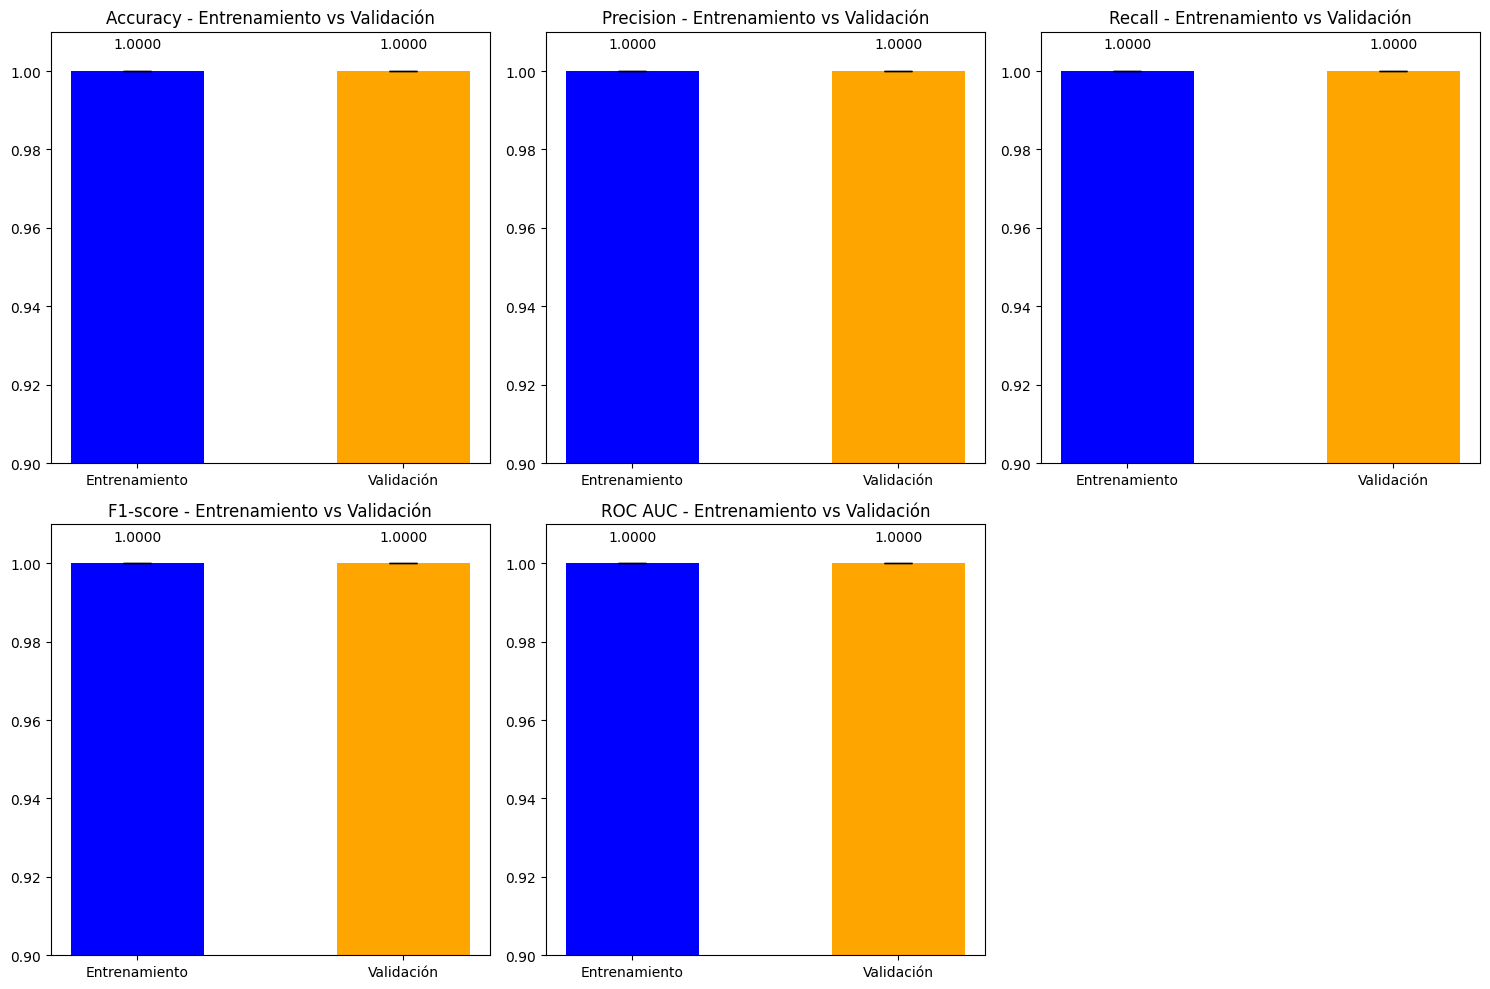

In [ ]:
# Comparar rendimiento en entrenamiento vs validación
print("\n3.3 Comparación de rendimiento: Entrenamiento vs Validación")
metrics_pairs = [
    ('train_accuracy', 'test_accuracy', 'Accuracy'),
    ('train_precision', 'test_precision', 'Precision'),
    ('train_recall', 'test_recall', 'Recall'),
    ('train_f1', 'test_f1', 'F1-score'),
    ('train_roc_auc', 'test_roc_auc', 'ROC AUC')
]

plt.figure(figsize=(15, 10))
for i, (train_metric, test_metric, name) in enumerate(metrics_pairs):
    plt.subplot(2, 3, i+1)
    
    # Datos para el gráfico
    train_means = cv_results[train_metric].mean()
    test_means = cv_results[test_metric].mean()
    train_stds = cv_results[train_metric].std()
    test_stds = cv_results[test_metric].std()
    
    # Crear barras
    bars = plt.bar([1, 2], [train_means, test_means], yerr=[train_stds, test_stds],
                  width=0.5, capsize=10, color=['blue', 'orange'])
    
    # Añadir etiquetas
    plt.xticks([1, 2], ['Entrenamiento', 'Validación'])
    plt.title(f'{name} - Entrenamiento vs Validación')
    plt.ylim(0.9, 1.01)  # Ajustar según los resultados esperados
    
    # Añadir valores sobre las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
#plt.savefig('train_vs_test_metrics.png')
plt.show()

In [28]:
# Comparar diferentes modelos con validación cruzada
print("\n4.1 Comparación de diferentes modelos con validación cruzada")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Definir modelos a comparar
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Regresión Logística': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Evaluar cada modelo con validación cruzada
results = {}
for name, model in models.items():
    print(f"\nEvaluando {name}...")
    cv_scores = cross_validate(model, X_scaled, y, cv=kf, scoring='f1')
    results[name] = {
        'mean': cv_scores['test_score'].mean(),
        'std': cv_scores['test_score'].std()
    }
    print(f"F1-score: {results[name]['mean']:.4f} ± {results[name]['std']:.4f}")


4.1 Comparación de diferentes modelos con validación cruzada

Evaluando Random Forest...
F1-score: 1.0000 ± 0.0000

Evaluando Regresión Logística...
F1-score: 0.9999 ± 0.0000

Evaluando SVM...
F1-score: 0.9998 ± 0.0001

Evaluando KNN...
F1-score: 0.9988 ± 0.0001


5. Conclusiones de la validación cruzada:

1. El modelo Random Forest muestra un rendimiento excepcional y consistente en todos los folds,
   con métricas muy altas y desviaciones estándar muy bajas, lo que confirma
   la robustez y fiabilidad del modelo para la detección de phishing.

2. La comparación entre métricas de entrenamiento y validación muestra que
   el modelo generaliza muy bien, sin signos de sobreajuste significativo.

3. Al comparar con otros algoritmos de clasificación, Random Forest mantiene
   su superioridad en términos de rendimiento y estabilidad para esta tarea.

4. La validación cruzada confirma que el rendimiento excepcional observado
   en evaluaciones anteriores es consistente y no producto del azar o
   de una división favorable de los datos de entrenamiento/prueba.